# mkGridIterative
This notebook demonstrates how to use the grid generation library as
an iterative method.  This method is iterative in the sense the
notebook is rerun each time after adjusting the grid parameters.

This notebook reproduces several example grids from Niki Zadah's
[notebook](https://github.com/nikizadehgfdl/grid_generation/blob/dev/jupynotebooks/regional_grid_spherical.ipynb).

In [1]:
# conda: holo37 xesmfTools

# Required to manipulate sys.path and access environment
# variables via os.environ.
import os, sys

# cd to the 'lib' directory in your notebooks directory
# $ export LIBROOT=`pwd`
# Start jupyter lab from any directory

# Still debugging the proper environment paths
# This uses full pathnames
if (os.environ.get('LIBROOT')):
    sys.path.append(os.environ.get('LIBROOT'))
else:
    # Detect use of this notebook in mybinder.org
    cDir = os.getcwd()
    if cDir == '/home/jovyan/gridTools':
        sys.path.append('/home/jovyan/gridTools/lib')

# This allows us to use relative paths to the
# grid tools library.
#sys.path.append('lib')
    
from gridutils import GridUtils
%matplotlib inline

In [2]:
# Instantiate a grid tools library object
# Adjust message levels from the library
grd = GridUtils()
grd.setVerboseLevel('INFO')
grd.setDebugLevel(2)

New DEBUG level (2)


In [3]:
# Demonstrate a plotting error when you attempt to plot a grid without projection information
grd.clearGrid()
(figure, axes) = grd.plotGrid()

Please set the plot 'projection' parameter 'name'


In [4]:
# Make sure we erase any previous grid, grid parameters and plot parameters.
grd.clearGrid()

# Lambert Conformal Conic
This section demonstrates the generation of a Lambert Conformal Conic
grid.  The grid is shown in several different projections.  A grid
shown in its native projection should be rectangular as an indication
that it is conformal.

In [5]:
# Specify the grid parameters
grd.setGridParameters({
    'projection': {
        'name': 'LambertConformalConic',
        'lon_0': 230.0,
        'lat_0': 40.0,
        'ellps': 'WGS84'
    },
    'centerX': 230.0,
    'centerY': 40.0,
    'centerUnits': 'degrees',
    'dx': 20.0,
    'dxUnits': 'degrees',
    'dy': 30.0,
    'dyUnits': 'degrees',
    'tilt': 30,
    'gridResolution': 1.0,
    'gridResolutionUnits': 'degrees',
    'gridMode': 2,
    'gridType': 'MOM6',
    'ensureEvenI': True,
    'ensureEvenJ': True
})

# To set or update dictionary items in 'projection', you can use the dictionary format above with a direct assigment
# or use the subKey parameter as in below.  
#grd.setGridParameters({
#    'name': 'LambertConformalConic',
#    'lon_0': 230.0,
#    'lat_0': 40.0,
#    'ellps': 'WGS84'
#}, subKey='projection')

In [6]:
# This forms a grid in memory using the specified grid parameters
grd.makeGrid()

Generating regular lat-lon grid centered at (230.00, 0.00) on equator.
   Generated regular lat-lon grid between latitudes -15.00 15.00
   Number of js=61


In [7]:
# Save the new grid to a netCDF file
grd.saveGrid(filename="configs/test/LCC_20x30.nc")

Successfully wrote netCDF file to configs/test/LCC_20x30.nc


In [8]:
# This prints out all the current grid parameters
# Note: for Lambert Conformal Conic grids, two additional projection parameters are computed.
#       First and second parallel for the grid (lat_1 and lat_2)
grd.showGridParameters()

Current grid parameters:
          projection: {'name': 'LambertConformalConic', 'lon_0': 230.0, 'lat_0': 40.0, 'ellps': 'WGS84', 'lat_1': 25.0, 'lat_2': 55.0, 'proj': '+ellps=WGS84 +proj=lcc +lon_0=230.0 +lat_0=40.0 +x_0=0.0 +y_0=0.0 +lat_1=25.0 +lat_2=55.0 +no_defs'}
             centerX: 230.0
             centerY: 40.0
         centerUnits: degrees
                  dx: 20.0
             dxUnits: degrees
                  dy: 30.0
             dyUnits: degrees
                tilt: 30
      gridResolution: 1.0
 gridResolutionUnits: degrees
            gridMode: 2
            gridType: MOM6
         ensureEvenI: True
         ensureEvenJ: True


In [9]:
# Show the data summary from xarray for the grid
grd.grid

<xarray.Dataset>
Dimensions:   (nx: 40, nxp: 41, ny: 60, nyp: 61)
Dimensions without coordinates: nx, nxp, ny, nyp
Data variables:
    x         (nyp, nxp) float64 -131.0 -130.5 -130.1 ... -129.8 -129.1 -128.3
    y         (nyp, nxp) float64 22.06 22.31 22.56 22.81 ... 57.44 57.69 57.93
    dx        (nyp, nx) float64 5.376e+04 5.376e+04 ... 5.376e+04 5.376e+04
    dy        (ny, nxp) float64 5.566e+04 5.566e+04 ... 5.566e+04 5.566e+04
    angle_dx  (nyp, nxp) float64 0.5526 0.5504 0.5451 ... 0.5422 0.5331 0.53
    area      (ny, nx) float64 2.996e+09 2.996e+09 ... 2.996e+09 2.996e+09
Attributes:
    grid_version:  0.2
    code_version:  GridTools: 0.1
    history:       2021-05-04 22:22:55: created grid with GridTools library
    projection:    LambertConformalConic
    proj:          +ellps=WGS84 +proj=lcc +lon_0=230.0 +lat_0=40.0 +x_0=0.0 +...

In [10]:
# Define plot parameters so we can see what the grid looks like
grd.setPlotParameters(
    {
        'figsize': (8,8),
        'projection': {
            'name': 'NearsidePerspective',
            'lat_0': 40.0,
            'lon_0': 230.0
        },
        'extent': [-160.0 ,-100.0, 20.0, 60.0],
        'iLinewidth': 1.0,
        'jLinewidth': 1.0,
        'showGridCells': True,
        'title': "Nearside Perspective: 20x30 with 30 degree tilt",
        'iColor': 'k',
        'jColor': 'k'
    }
)

# Projection may be specified separately
grd.setPlotParameters(
    {
        'name': 'NearsidePerspective',
        'lat_0': 40.0,
        'lon_0': 230.0        
    }, subKey='projection'
)

In [11]:
# When we call plotGrid() we have two python objects returned
# Figure object - you have control whether to show the 
#   figure or save the contents to an output file
# Axes object - you can further fine tune plot parameters, 
#   titles, axis, etc prior to the final plotting of the figure.
#   Some items may be configured via the figure object.
(figure, axes) = grd.plotGrid()

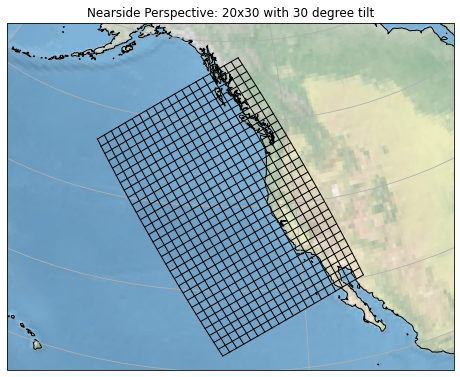

In [12]:
# For display in jupyterlab, place the figure variable solo in a cell
figure

In [13]:
# You can save the figure using the savefig() method on the
# figure object.  Many formats are possible.
figure.savefig('configs/test/LCC_20x30.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', transparent=False, bbox_inches=None, pad_inches=0.1)

In [14]:
# Plot last grid also on a Mercator projection
grd.setPlotParameters(
    {
        'figsize': (8,8),
        'projection': {
            'name': 'Mercator',
            'lat_0': 40.0,
            'lon_0': 230.0
        },
        'extent': [-160.0 ,-100.0, 20.0, 60.0],
        'iLinewidth': 1.0,
        'jLinewidth': 1.0,
        'showGridCells': True,
        'title': "Mercator: 20x30 with 30 degree tilt",
        'iColor': 'k',
        'jColor': 'k'
    }
)

In [15]:
(figure, axes) = grd.plotGrid()

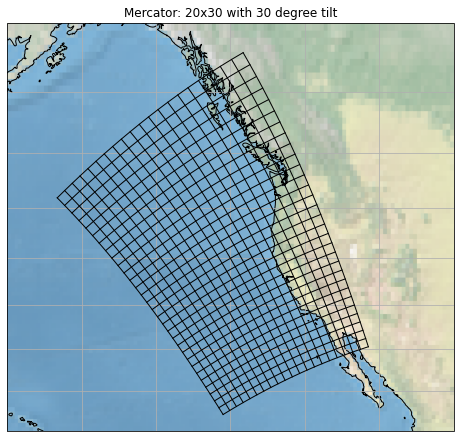

In [16]:
figure

In [17]:
# Show in Lambert Conformal Conic
grd.setPlotParameters(
    {
        'figsize': (8,8),
        'projection': { 
            'name': 'LambertConformalConic',
            'lon_0': 230.0,
            'lat_1': 25.0,
            'lat_2': 55.0
        },
        'extent': [-160.0 ,-100.0, 20.0, 60.0],
        'iLinewidth': 1.0,
        'jLinewidth': 1.0,
        'showGridCells': True,
        'title': 'Lambert Conformal Conic: 20x30 with 30 degree tilt',
        'iColor': 'k',
        'jColor': 'k'
    }
)

In [18]:
(figure, axes) = grd.plotGrid()

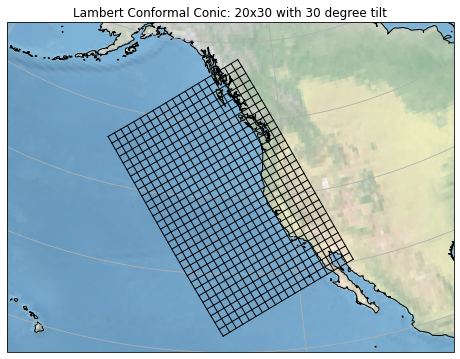

In [19]:
figure

# Spherical
This section demonstrates the generation of a spherical grids.

## Degrees
This grid is generated using grid distances specified in degrees.  A grid tilt may also be specified.  These grids may not be conformal!

In [20]:
grd.clearGrid()

In [21]:
# Specify the grid parameters
grd.setGridParameters({
    'projection': {
        'name': 'Stereographic',
        'lon_0': 210.0,
        'lat_0': 90.0,
        'ellps': 'WGS84'
    },
    'centerX': 210.0,
    'centerY': 90.0,
    'centerUnits': 'degrees',
    'dx': 60.0,
    'dxUnits': 'degrees',
    'dy': 60.0,
    'dyUnits': 'degrees',
    'tilt': 0.0,
    'gridResolution': 1.0,
    'gridMode': 2,
    'gridResolutionUnits': 'degrees',
    'gridType': 'MOM6',
    'ensureEvenI': True,
    'ensureEvenJ': True    
})

In [22]:
grd.makeGrid()

Generating regular lat-lon grid centered at (210.00, 0.00) on equator.
   Generated regular lat-lon grid between latitudes -30.00 30.00
   Number of js=121


In [23]:
# Show the new grid
grd.setPlotParameters(
    {
        'figsize': (8,8),
        'projection': {
            'name': 'NorthPolarStereo',    
            'lon_0': 160.0
        },
        'extent': [-180, 180, 38, 90],
        'iLinewidth': 1.0,
        'jLinewidth': 1.0,
        'showGridCells': True,
        'title': 'North Polar Stereo: 120x120',
        'iColor': 'k',
        'jColor': 'k'
    }
)

In [24]:
(figure, axes) = grd.plotGrid()

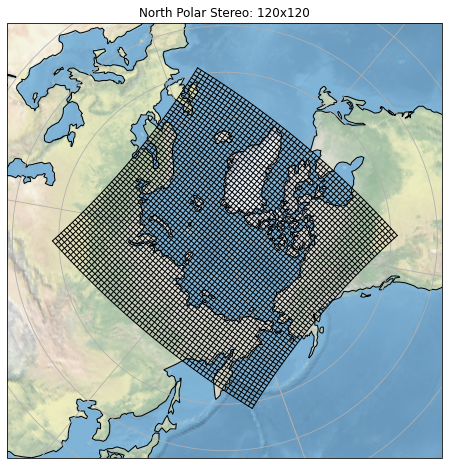

In [25]:
figure

In [26]:
grd.setPlotParameters(
    {
        'figsize': (8,8),
        'projection': {
            'name': 'NearsidePerspective',
            'lon_0': 230.0,
            'lat_0': 90.0
        },
        'extent': [],
        'iLinewidth': 1.0,
        'jLinewidth': 1.0,
        'showGridCells': True,
        'title': "Nearside Perspective: 60x60",
        'iColor': 'k',
        'jColor': 'k'
    }
)

In [27]:
(figure, axes) = grd.plotGrid()

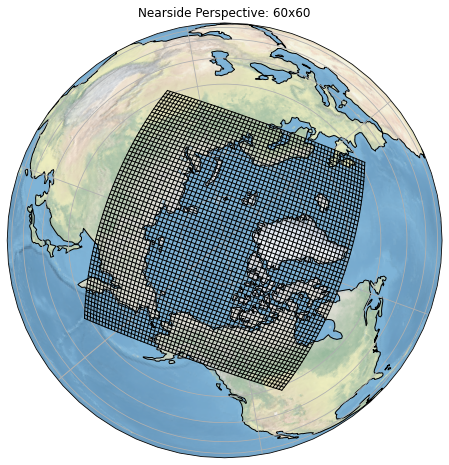

In [28]:
figure

## Meters
This grid is generated using grid distances specified in meters.  Grid tilt is not a valid option.However, grid rotation may be achieved using the lon_0 projection parameter.

The example notebook, mkGridsExample4.ipynb, demonstrates how a spherical grid can be created outside
the grid generation library and plotted.  The notebook also shows how to obtain the same grid using
the library.

# Mercator
This section demonstates the generation of mercator grids.

# Degrees
This grid is generated using grid distances specified in degrees.  A grid tilt may also be specified but may not produce conformal grids!

In [29]:
grd.clearGrid()

In [30]:
# Specify the grid parameters
grd.setGridParameters({
    'projection': {
        'name': 'Mercator',
        'lon_0': 230.0,
        'lat_0': 40.0,
        'ellps': 'WGS84'
    },
    'centerX': 230.0,
    'centerY': 40.0,
    'centerUnits': 'degrees',
    'dx': 20.0,
    'dxUnits': 'degrees',
    'dy': 30.0,
    'dyUnits': 'degrees',
    'tilt': 0.0,
    'gridResolution': 1.0,
    'gridMode': 2,
    'gridResolutionUnits': 'degrees',
    'gridType': 'MOM6',
    'ensureEvenI': True,
    'ensureEvenJ': True    
})

In [31]:
# Create the grid
grd.makeGrid()

Generating regular lat-lon grid centered at (230.00 40.00).
   Generated regular lat-lon grid between latitudes 25.00 55.00
   Number of js=61


In [32]:
# Show the new grid
grd.setPlotParameters(
    {
        'figsize': (8,8),
        'projection': {
            'name': 'Mercator',
            'lat_0': 40.0,
            'lon_0': 230.0
        },
        'extent': [-160.0 ,-100.0, 20.0, 60.0],
        'iLinewidth': 1.0,
        'jLinewidth': 1.0,
        'showGridCells': True,
        'title': "Mercator projection: 20x30 with 30 degree tilt",
        'iColor': 'k',
        'jColor': 'k'
    }
)

In [33]:
(figure, axes) = grd.plotGrid()

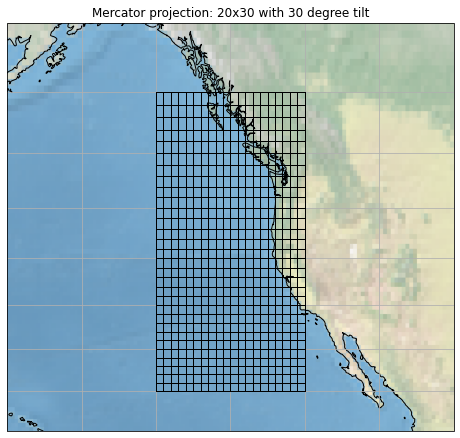

In [34]:
figure

In [35]:
# Show the new grid
grd.setPlotParameters(
    {
        'figsize': (8,8),
        'projection': {
            'name': 'NearsidePerspective',
            'lat_0': 40.0,
            'lon_0': 230.0
        },
        'extent': [-160.0 ,-100.0, 20.0, 60.0],
        'iLinewidth': 1.0,
        'jLinewidth': 1.0,
        'showGridCells': True,
        'title': "Nearside Perspective: 20x30 with 30 degree tilt",
        'iColor': 'k',
        'jColor': 'k'
    }
)

In [36]:
(figure, axes) = grd.plotGrid()

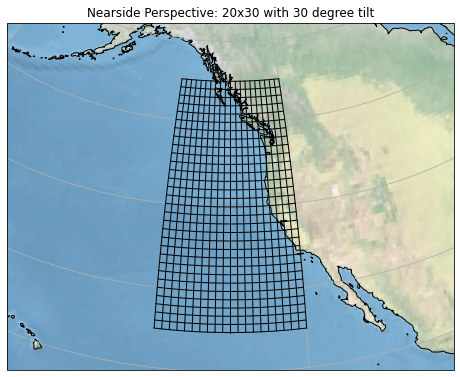

In [37]:
figure

# Loading grids
In these next examples, we load existing grids.  These examples also demonstrate creating figures and presenting them in later notebook cells.
The figure and axes objects are made available so additional customization can be performed prior to producing the plot.  This allows for
additional control of plots generated by the library.

In [38]:
# Arctic Grid #6
# Demonstration of a North Polar Stereo projection grid
# Central longitude of 160.0
arctic6 = '/home/cermak/gridtools/gridTools/configs/Arctic6/ocean_hgrid.nc'
grd.clearGrid()
grd.openDataset(arctic6)
grd.readGrid()
grd.closeDataset()

In [39]:
grd.setPlotParameters(
    {
        'figsize': (8,8),
        'projection': {
            'name': 'NorthPolarStereo',    
            'lon_0': 160.0
        },
        'extent': [-180, 180, 38, 90],
        'iLinewidth': 1.0,
        'jLinewidth': 1.0,
        'showGrid': True,
        'title': 'North Polar Stereo: Arctic6',
        'iColor': 'k',
        'jColor': 'k'
    }
)

In [40]:
# In the next to calls to plotGrid() we store the plots to variables
# that are shown later.
(figureArctic, axesArctic) = grd.plotGrid()

In [41]:
# NEP7: North East Pacific Grid #7
# Demonstration of Lambert Conformal Conic projection
nep7 = '/home/cermak/gridtools/gridTools/configs/NEP7/ocean_hgrid.nc'
grd.clearGrid()
grd.openDataset(nep7)
grd.readGrid()
grd.closeDataset()

In [42]:
grd.setPlotParameters(
    {
        'figsize': (8,8),
        'projection': {
            'name': 'LambertConformalConic',
            'lon_0': -91.0,
            'lat_1': 40.0,
            'lat_2': 60.0
        },
        'extent': [-180, 180, 10.5, 90],
        'iLinewidth': 1.0,
        'jLinewidth': 1.0,
        'showGrid': True,
        'title': 'Lambert Conformal Conic: NEP7',
        'iColor': 'k',
        'jColor': 'k'
    }
)

In [43]:
(figureNEP, axesNEP) = grd.plotGrid()

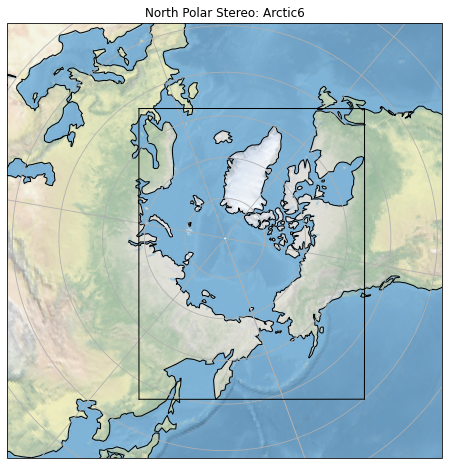

In [44]:
# Show the above figures here instead.
# Only one figure per cell is supported.  Each figure is shown in separate cells.
figureArctic

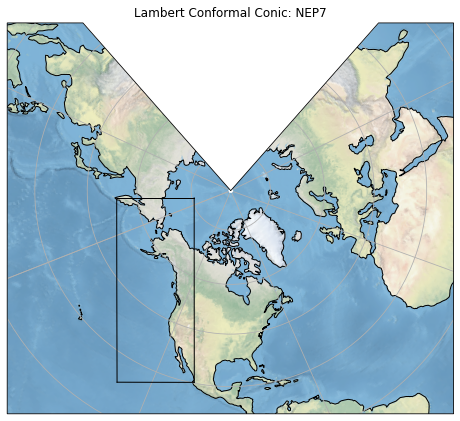

In [45]:
figureNEP